In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
colNames = ['timeStamp', 'ganglionTime', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3']
d = pd.read_csv("../Data/record.csv_2018-11-13_18-21-30.csv", sep=',', names=colNames)

In [3]:
d.tail()

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
5653,81.8436090946,132.0,-0.297634,0.082068,0.488588,0.545167,0.0,0.0,0.0
5654,81.8443958759,133.0,-0.310141,0.049326,0.329878,0.300589,0.0,0.0,0.0
5655,81.8444509506,134.0,-0.131233,0.220970,0.416948,0.257045,0.0,0.0,0.0
5656,81.8877370358,135.0,-0.131379,0.234028,0.560996,0.478236,0.0,0.0,0.0
5657,81.8878228664,136.0,-0.301230,0.084533,0.495522,0.547804,0.0,0.0,0.0


In [4]:
d.shape

(5658, 9)

In [5]:
d[250:251]

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
250,25.6844558716,66.0,-0.098326,0.24981,0.511772,0.336995,0.0,0.0,0.0


In [6]:
t = d.timeStamp

In [7]:
eeg = np.array(d.ix[0:, 2:6])
eeg = eeg[250:,]

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
eeg

array([[-0.0983257 ,  0.24981034,  0.51177162,  0.33699488],
       [-0.22401625,  0.14923322,  0.56484641,  0.52613096],
       [-0.3699995 ,  0.03813576,  0.44908903,  0.47769552],
       ..., 
       [-0.13123308,  0.22097011,  0.41694833,  0.25704518],
       [-0.13137894,  0.23402797,  0.56099618,  0.47823594],
       [-0.30123022,  0.08453295,  0.49552175,  0.54780368]])

In [9]:
eeg.shape

(5408, 4)

In [10]:
eeg = eeg[350:, :]

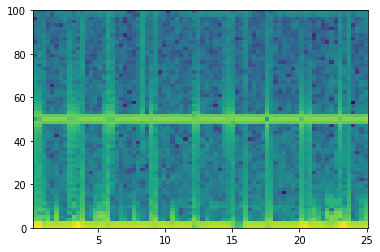

In [11]:
_ = plt.specgram(eeg[:, 0], NFFT=128, Fs=200, noverlap=64)

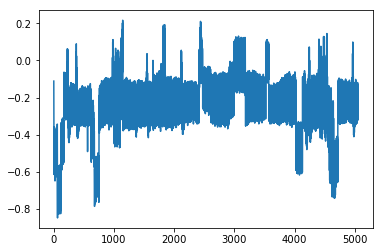

In [12]:
plt.plot(eeg[:, 0])

In [13]:
from scipy import signal

In [14]:
# filter from 5 to 35 Hz, helps remove 60Hz noise and replicates paper
## also helps remove the DC line noise (baseline drift)
## 125 is half the sampling rate (250Hz/2)
b, a = signal.butter(4, (2.0/125, 35.0/125), btype='bandpass') 
b, a

(array([ 0.01222321,  0.        , -0.04889285,  0.        ,  0.07333928,
         0.        , -0.04889285,  0.        ,  0.01222321]),
 array([  1.        ,  -5.71974179,  14.41372236, -21.04755049,
         19.59013879, -11.93007722,   4.63594027,  -1.04851038,   0.10608002]))

In [15]:
eeg_f = signal.lfilter(b, a, eeg, axis=0)

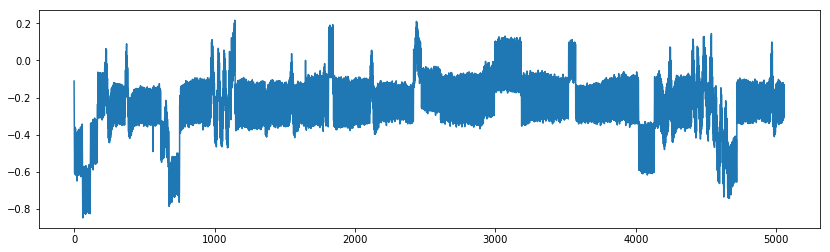

In [16]:
plt.figure(figsize=(14, 4))
plt.plot(eeg[:, 0]) ## raw data

In [17]:
from sklearn.decomposition import FastICA

In [18]:
ica = FastICA()
sources = ica.fit_transform(eeg_f)
means = ica.mean_.copy()
mixing = ica.mixing_.copy()

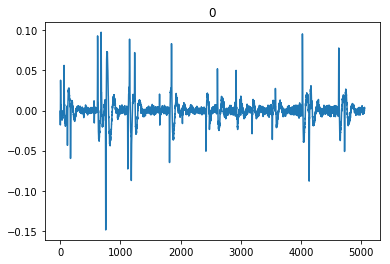

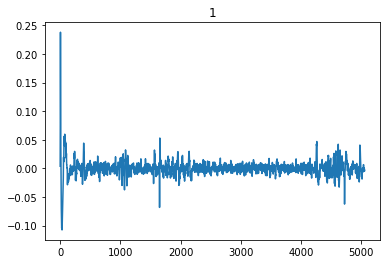

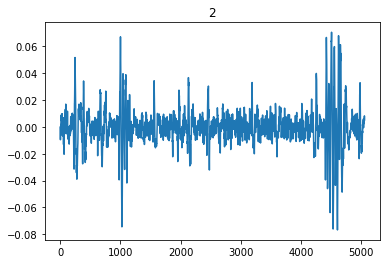

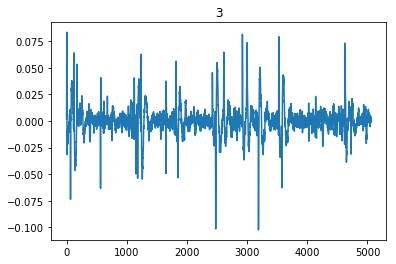

In [19]:
## look at the plots to find the eyeblink component
## TODO: make a more robust eyeblink component finder
for i in range(ica.components_.shape[0]):
    plt.figure()
    plt.plot(sources[:8500, i])
    plt.title(i)

In [20]:
eye_blinks_ix = 3

In [21]:
mixing[:, eye_blinks_ix] = 0 # setting eyeblink component to 0
eeg_ff = sources.dot(mixing.T) + means # this is the ICA inverse transform

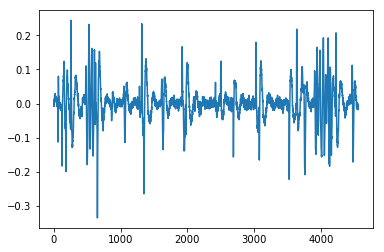

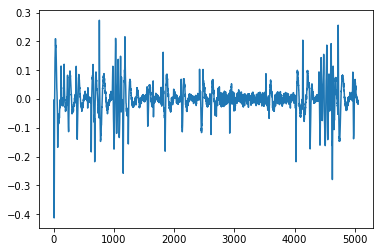

In [22]:
plt.figure()
plt.plot(eeg_f[500:9000, 0])

plt.figure()
plt.plot(eeg_ff[:8500, 0])